<center><img alt="" src="images/Cover_EDA.jpg"/></center> 

## <center><font color="blue">EDA-03: Unsupervised Learning - Clustering</font></center>

<h2 id="(C)-Taufik-Sutanto---2019" style="text-align: center;">(C) Taufik Sutanto - 2020</h2>
<h2 id="tau-data-Indonesia-~-https://tau-data.id/eda-03/" style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id/eda-03/" target="_blank"><span style="color: #0009ff;">https://tau-data.id/eda-03/</span></a></h2>

In [ ]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

In [2]:
# Kita akan menggunakan 2 data: [1]. Iris dan [2]. Data untuk Studi Kasus (segmentasi kustomer) - di bagian akhir
# load the iris data

df = sns.load_dataset("iris")
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
C = df['species'].values
print(X.shape)
df.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


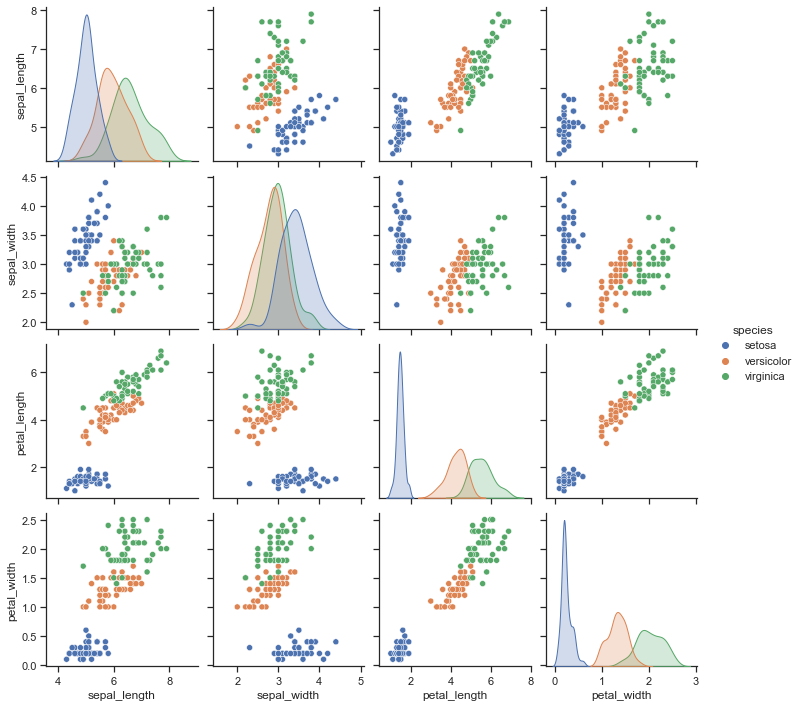

In [3]:
g = sns.pairplot(df, hue="species")

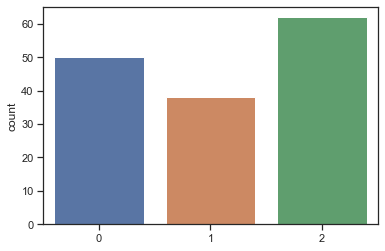

In [4]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Hapus "random_state = random_state" jika ingin melihat efek randomized centroid.
k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(C_km)

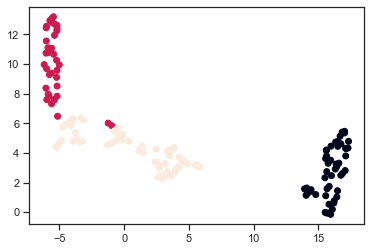

In [5]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

# Apa beda label ini dengan klasifikasi ("labels")?

In [6]:
C_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [7]:
km.inertia_

78.851441426146

# Optimal Number of Clusters? - Elbow Method - 

* Menggunakan inertia
* Rekomendasi ... Bukan "wajib" ==> Lalu apa yang lebih penting?

Text(0.5, 1.0, 'Elbow curve')

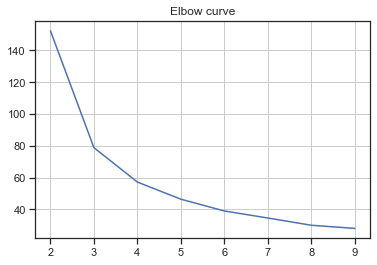

In [8]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

# Ponder this

### Apakah akibat dari mengacak (randomized) centroid di awal algoritma?
### k-Means sangat tidak direkomendasikan untuk diaplikasikan di aplikasi nyata ... Loh? Mengapa?

Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init
Evaluation of MiniBatchKMeans with k-means++ init
Evaluation of MiniBatchKMeans with random init


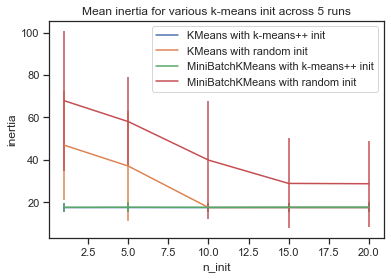

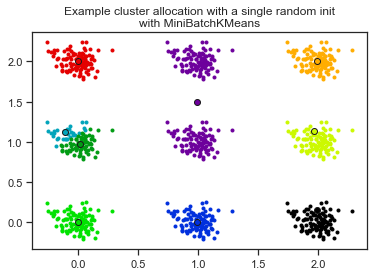

In [9]:
tau.km_initializations()

array([1, 8, 8, 8, 1, 1, 8, 1, 8, 8])

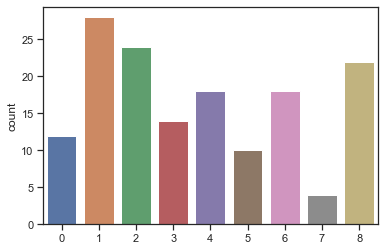

In [10]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(C_kmpp)
C_kmpp[:10]

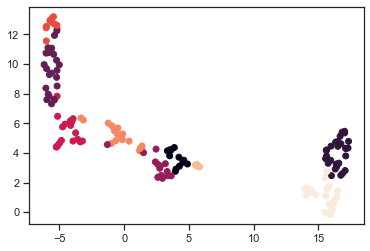

In [11]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

array([2, 8, 8, 8, 2, 2, 8, 2, 8, 2])

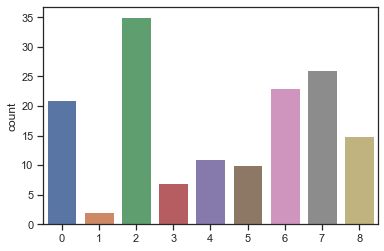

In [12]:
# MiniBatch k-Means 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# minibatch "tidak bisa parallel"!!!...
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk
mbkm = cluster.MiniBatchKMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, batch_size = 100, random_state = random_state) 
mbkm.fit(X)
C_mbkm = mbkm.predict(X)
sns.countplot(C_mbkm)
C_mbkm[:10]

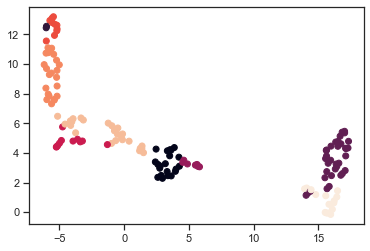

In [13]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkm)
plt.show()

# Minibatch k-Means++

array([0, 5, 5, 5, 0, 0, 5, 0, 5, 5])

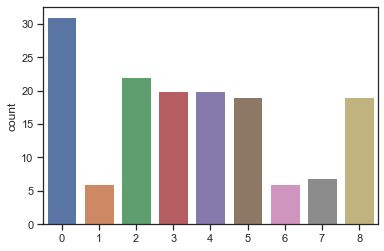

In [14]:
# MiniBatch k-Means++
mbkmPP = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state) 
mbkmPP.fit(X)
C_mbkmPP = mbkmPP.predict(X)
sns.countplot(C_mbkmPP)
C_mbkmPP[:10]

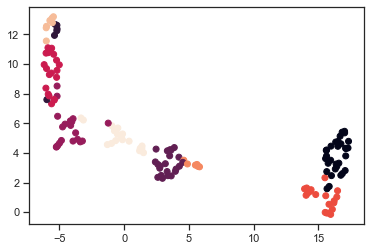

In [15]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkmPP)
plt.show()

## k_means VS MiniBatch k-Means?

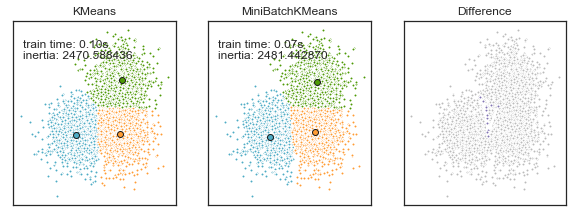

In [16]:
tau.km_vs_mbkm()

# Ingat tujuan clustering analysis di Data Mining/Data Science

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.4387644975296138


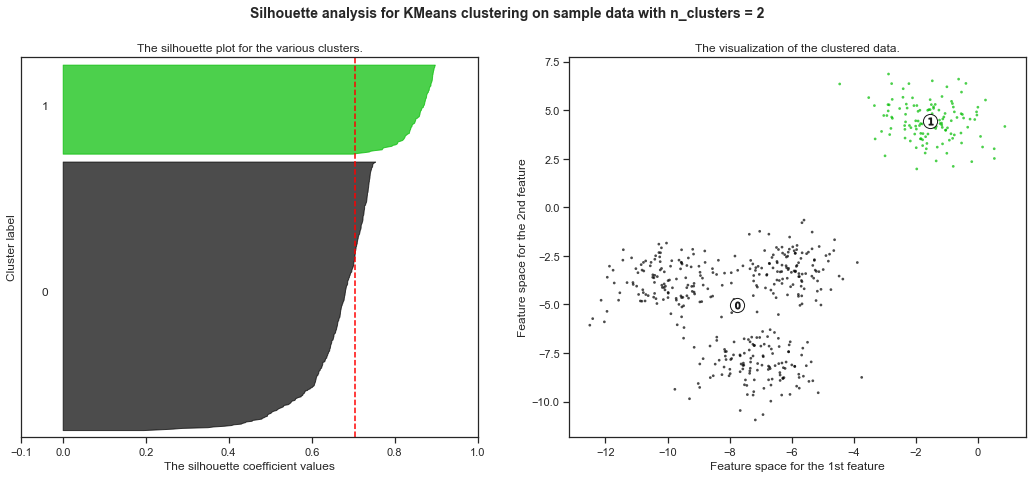

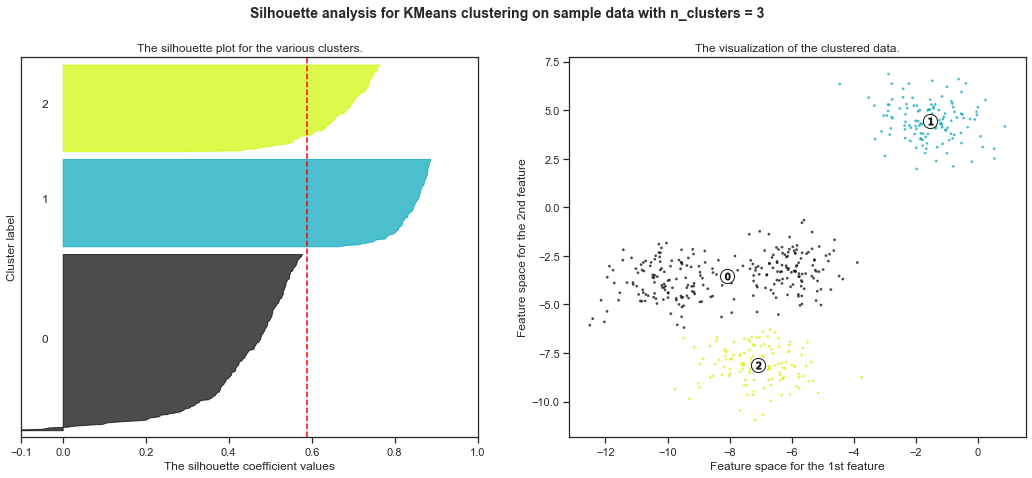

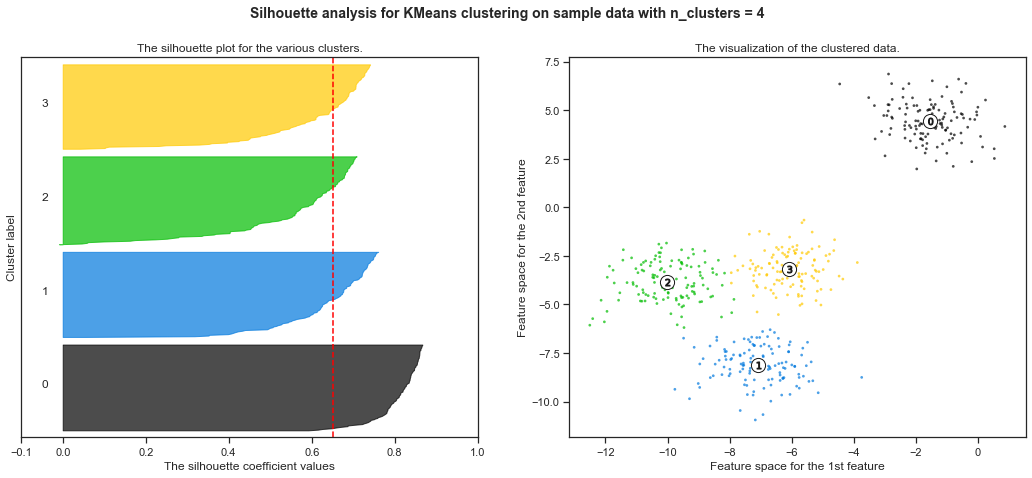

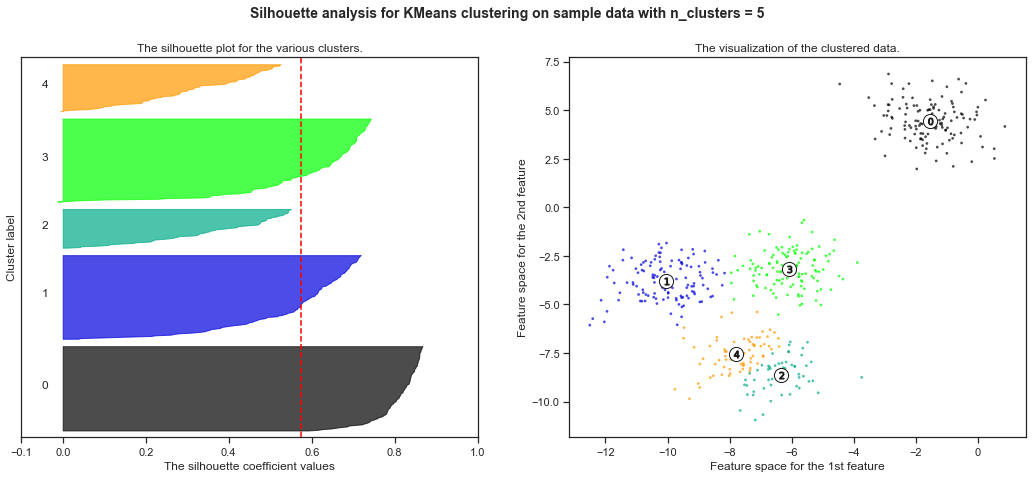

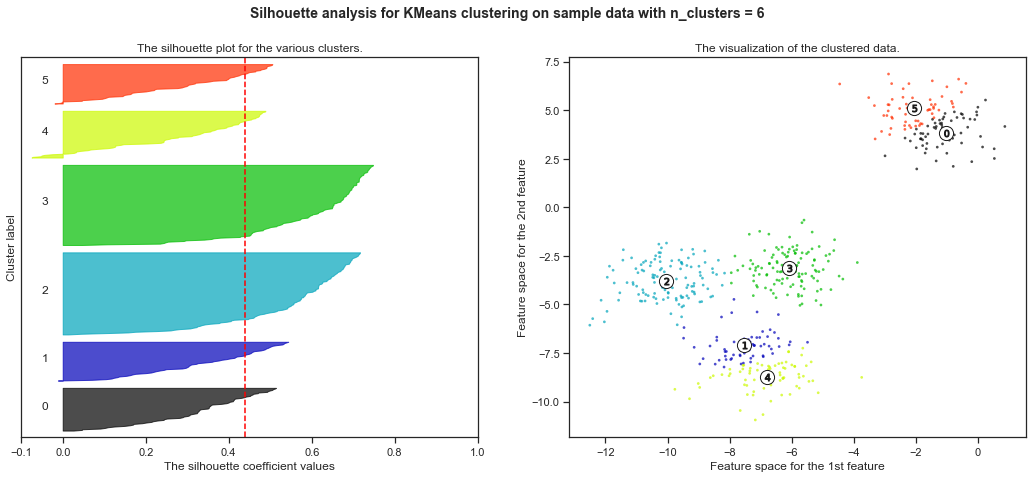

In [17]:
tau.sil_based_optimal_km()

In [18]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means (centroid-based clustering)
Hasil_Clustering = [C_km, C_kmpp, C_mbkm, C_mbkmPP]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')
# Bagaimana cara kerja dan interpretasinya?

0.5528190123564102, 0.3409401718963998, 0.3148248414730011, 0.3300008739279058, 

In [19]:
# Bagaimana dengan evaluasi External?
# "C" adalah ground truth/golden standard
for res in Hasil_Clustering:
    print(purity(C,res), end=', ')

0.7514854021988338, 0.9289251064091244, 0.851260161099677, 0.914583082690499, 

In [20]:
# Evaluasi External NMI 
for res in Hasil_Clustering:
    print(NMI(C,res), end=', ')
# untuk F-Score ada juga code dan penjelasannya di blog post di atas

0.7581756800057784, 0.6386031903888214, 0.6018604639899633, 0.6344725698080745, 

## Please read more here:  https://tau-data.id/evaluasi-eksternal/

# Cara menarik kesimpulan dari k-Means: Interpretasi

In [21]:
kmPP.cluster_centers_

array([[5.625     , 2.54166667, 3.86666667, 1.15833333],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.61666667, 3.07916667, 5.5625    , 2.1375    ],
       [5.67142857, 2.88571429, 4.31428571, 1.39285714],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [7.54      , 3.15      , 6.39      , 2.09      ],
       [6.47777778, 2.91666667, 4.6       , 1.42222222],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ]])

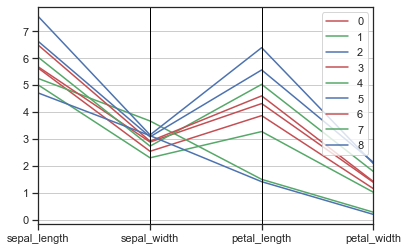

In [22]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means++

cols = ['sepal_length','sepal_width','petal_length','petal_width']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

# End of Module 

<hr />